In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from datetime import datetime
# import warnings filter

In [106]:
x = pd.read_csv("inputInfo_X.csv")

In [157]:
y = pd.read_csv("inputInfo_Y.csv")

In [124]:
len(x)

3696

In [477]:
actor_dummy = pd.DataFrame(mlb.fit_transform(x["main actors"]),columns = mlb.classes_,index=x.index)

In [6]:
def word_freq(word_list):
    word_map = {}
    for a in word_list:
        for word in a:
            if word in word_map:
                word_map[word] += 1
            else:
                word_map.update({word : 1})
    return sorted(word_map.items(), key=lambda kv: kv[1],reverse=True)

In [129]:
def categorize(val,dictionary):
    new_enum = []
    for item in val:
        item = item.replace(" ","")
        if item in dictionary.keys():
            new_enum.append(dictionary.get(item))
    return new_enum
            

In [134]:
def convert_to_int(array):
    for i in array:
        return i

In [7]:
def convert_to_list(val):
    new_list = []
    for i in range(len(val)):
        new_list.append(val[i][0].strip())
    return new_list



In [8]:
def check_existence(value,attribute):
    for i in value:
        if i in attribute:
            return True
        else:
            return False

In [9]:
def convert_to_array(rating):
    rating = str(rating)
    rating = rating.lower()
    rating = rating.split(",")
    return rating

In [130]:
def give_unique_list(array):
    unique_val = {}
    counter = 0
    for i in array:
        for val in i:
            val = val.replace(" ","")
            if val not in unique_val.keys():
                unique_val[val] = counter
                counter +=1
    return unique_val

### Convert the columns with multiple string entries to a list. This is will assist for converting each string entry to dummy variables

In [108]:
x["genre_x"]= x["genre_x"].apply(lambda x: convert_to_array(x))
x["country"] = x["country"].apply(lambda x: convert_to_array(x))
x["director"] = x["director"].apply(lambda x: convert_to_array(x))
x["writer"] = x["writer"].apply(lambda x: convert_to_array(x))
x["production_company"] = x["production_company"].apply(lambda x: convert_to_array(x))
x["actors"] = x["actors"].apply(lambda x: convert_to_array(x))
x["title"] = x["title"].apply(lambda x: convert_to_array(x))

### Let's convert the release date of the movie to months

In [128]:
x["season_published"] = x["date_published"].apply(lambda x: pd.to_datetime(x).month)

### Selecting the top actor,director and writer for each row. Solution in place of label encoding

In [312]:
x["actors"] = x["actors"].apply(lambda x: x[:1])
x["director"] = x["director"].apply(lambda x: x[:1])
x["writer"] = x["writer"].apply(lambda x: x[:1])

### Selecting the most frequent occurences of the production company, writer and countries

In [110]:
prod_company = word_freq(x["production_company"])[:200]
producers = convert_to_list(prod_company)

In [119]:
writer = convert_to_list(word_freq(x["writer"])[:100])
countries = convert_to_list(word_freq(x["country"])[:100])

In [92]:
actors = convert_to_list(word_freq(x["main actors"])[:200])

### Creating dummy variables since the rows consist of multiple entries i.e multiple actors are listed for the row of actors so these need to be set as columns to be passed in the model

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

genre_dummy = pd.DataFrame(mlb.fit_transform(x["genre_x"]),columns=mlb.classes_, index=x.index)
country_dummy = pd.DataFrame(mlb.fit_transform(x["country"]),columns = mlb.classes_,index=x.index)

director_dummy = pd.DataFrame(mlb.fit_transform(x["director"]),columns = mlb.classes_,index=x.index)
writer_dummy = pd.DataFrame(mlb.fit_transform(x["writer"]),columns = mlb.classes_,index=x.index)


In [125]:
country_dummy = pd.DataFrame(mlb.fit_transform(x["country"]),columns = mlb.classes_,index=x.index)

In [126]:
country_dummy.head()

,afghanistan,argentina,australia,austria,bahamas,belgium,brazil,bulgaria,cambodia,canada,...,portugal,romania,russia,south africa,spain,sweden,uk,united arab emirates,usa,west germany
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [118]:
genre_dummy = pd.DataFrame(mlb.fit_transform(x["genre_x"]),columns=mlb.classes_, index=x.index)

In [116]:
producer_dummy = pd.DataFrame(mlb.fit_transform(x["production_company"]),columns = mlb.classes_,index=x.index)

In [117]:
producer_dummy.head()

,2929 productions,3 arts entertainment,40 acres & a mule filmworks,a24,aardman animations,affirm films,alcon entertainment,alcor films,alive films,all girl productions,...,voltage pictures,walt disney animation studios,walt disney feature animation,walt disney pictures,walt disney productions,warner bros.,working title films,worldview entertainment,zentropa entertainments,zoetrope studios
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
actor_dummy.head()

,aaron eckhart,abby craden,abigail breslin,adam brody,adam brooks,adam bryant,adam campbell,adam driver,adam hann-byrd,adrien brody,...,vince vaughn,walter matthau,wil wheaton,will ferrell,will smith,william h. macy,william prael,woody allen,woody harrelson,zoe saldana
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now we need to check if each row contains the frequent attribute for that attribute, if it does we keep and drop if not. This is to ensure we don't generate way too many columns for the dummy variables so that the model can handle such computation


In [94]:
x["writer_boolean"] = x["writer"].apply(lambda x: check_existence(x,writer))
x["country_boolean"] = x["country"].apply(lambda x: check_existence(x,countries))
x["actor_boolean"] = x["main actors"].apply(lambda x: check_existence(x,actors))
x["producer_boolean"] = x["production_company"].apply(lambda x: check_existence(x,producers))

### Needs to be ran in this order

In [112]:
prod_index = x[x['producer_boolean'] == False].index

In [96]:
indexNames = x[x['actor_boolean'] == False ].index

In [121]:
x["country_boolean"] = x["country"].apply(lambda x: check_existence(x,countries))

In [98]:
writer_index = x[x['writer_boolean'] == False].index

In [122]:
countries_index = x[x['country_boolean'] == False].index

In [123]:
x.drop(countries_index,inplace=True)

In [113]:
x.drop(prod_index,inplace=True)

In [99]:
x.drop(writer_index,inplace=True)

### Converts the selected attributes to their encoded values. Kind of works like a label encoder

In [131]:
checker = give_unique_list(x["country"])
genre = give_unique_list(x["genre_x"])
director = give_unique_list(x["director"])
writer = give_unique_list(x["writer"])
prod_company = give_unique_list(x["production_company"])
actors = give_unique_list(x["actors"])
title = give_unique_list(x["title"])

In [132]:
x["country_map"] = x["country"].apply(lambda x: categorize(x,checker))
#x["genre_map"] = x["genre_x"].apply(lambda x: categorize(x,genre))
x["director_map"] = x["director"].apply(lambda x: categorize(x,director))
x["writer_map"] = x["writer"].apply(lambda x: categorize(x,writer))
#x["producer_map"] = x["production_company"].apply(lambda x: categorize(x,prod_company))
x["actor_map"] = x["actors"].apply(lambda x: categorize(x,actors))
x["title_map"] = x["title"].apply(lambda x: categorize(x,title))

In [136]:
x["country_map"] = x["country_map"].apply(lambda x: convert_to_int(x))
x["director_map"] = x["director_map"].apply(lambda x: convert_to_int(x))
x["writer_map"] = x["writer_map"].apply(lambda x: convert_to_int(x))
x["actor_map"] = x["actor_map"].apply(lambda x: convert_to_int(x))


### Drop uneeded columns so our dataset is ready to be inputed our model

In [138]:
x_final = x.drop(["title","year","genre_x","country","director","writer","production_company","actors","date_published","producer_boolean","country_boolean","title_map"],axis=1)

In [455]:
x["actor_test"] = x["main actors"].apply(lambda x: get_value_list(x,actors))

In [151]:
x_final.head()

,duration,budget,rating,season_published,country_map,director_map,writer_map,actor_map
4,88,3500000,3,8,0,0,0,0
5,117,4800000,2,8,0,1,1,1
6,116,15000000,3,12,0,2,2,2
7,113,4500000,3,7,0,3,3,3
8,104,4500000,2,2,0,4,4,4


### Cleaning up the values to be predicted

In [142]:
y.head()

,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating,usa_gross_income,worlwide_gross_income
0,6.4,44.0,330.0,127.0,50,62.0,47121859,76019048
1,5.3,55.0,381.0,273.0,45,36.0,1826705,1882074
2,6.4,66.0,44.0,32.0,80,53.0,6118683,6118683
3,7.3,74.0,555.0,192.0,81,81.0,34469210,58469210
4,7.7,78.0,459.0,158.0,97,89.0,83453539,83453539


In [160]:
y_new = y[["tomatometer_rating","audience_rating","usa_gross_income","worlwide_gross_income"]]

In [161]:
y_new.head()

,tomatometer_rating,audience_rating,usa_gross_income,worlwide_gross_income
0,50,62.0,47121859,76019048
1,45,36.0,1826705,1882074
2,80,53.0,6118683,6118683
3,81,81.0,34469210,58469210
4,97,89.0,83453539,83453539


### Lets convert the audience and user rating to binary. According to rotten tomato when the score is equal or greater than 60% for the tomatometer rating then its a positive review and when its less its a negative scoring. The same applies for audience rating. It's also important to note that the tomatometer rating is the rating given by critics and the audience rating is from the regular movie goers

In [162]:
y_new["critic rating"] = y_new["tomatometer_rating"].apply(lambda x: 1 if x > 60.0 else 0)
y_new["audience_rating"] = y_new["audience_rating"].apply(lambda x: 1 if x > 60.0 else 0)

/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
y_new.drop(['tomatometer_rating'], axis=1,inplace=True)

/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [164]:
y_new.head()

,audience_rating,usa_gross_income,worlwide_gross_income,critic rating
0,1,47121859,76019048,0
1,0,1826705,1882074,0
2,0,6118683,6118683,1
3,1,34469210,58469210,1
4,1,83453539,83453539,1


In [165]:
y_new.drop(["usa_gross_income"],axis=1,inplace=True)

In [166]:
y_new.head()

,audience_rating,worlwide_gross_income,critic rating
0,1,76019048,0
1,0,1882074,0
2,0,6118683,1
3,1,58469210,1
4,1,83453539,1


In [170]:
y_new = y_new.iloc[:3696,:]

In [171]:
len(y_new)

3696

In [172]:
y_audience = y_new["audience_rating"]
y_critic = y_new["critic rating"]
y_income = y_new["worlwide_gross_income"]

# Now lets build the model

In [257]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [173]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_final,y_audience, test_size=0.3, random_state=42)

In [174]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix,accuracy_score

In [175]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 20, alpha = 10, n_estimators = 200)

In [176]:
xg_reg.fit(x_train_normal,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
pred = xg_reg.predict(x_test_norm)

In [178]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.41%


# Let's see if adding in the genre improves the prediction

In [179]:
x_genre = pd.concat([x_final,genre_dummy],axis=1)

In [180]:
x_genre.head()

,duration,budget,rating,season_published,country_map,director_map,writer_map,actor_map,action,adventure,...,crime,drama,family,fantasy,horror,mystery,romance,sci-fi,thriller,western
4,88,3500000,3,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,117,4800000,2,8,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,116,15000000,3,12,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,113,4500000,3,7,0,3,3,3,0,0,...,0,1,0,0,0,0,0,0,0,0
8,104,4500000,2,2,0,4,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_genre,y_audience, test_size=0.3, random_state=42)

In [182]:
xg_reg.fit(x_train_normal,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [183]:
pred = xg_reg.predict(x_test_norm)

In [184]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.67%


## Lets add the producer

In [185]:
x_producer = pd.concat([x_genre, producer_dummy],axis=1)

In [186]:
x_producer.head()

,duration,budget,rating,season_published,country_map,director_map,writer_map,actor_map,action,adventure,...,voltage pictures,walt disney animation studios,walt disney feature animation,walt disney pictures,walt disney productions,warner bros.,working title films,worldview entertainment,zentropa entertainments,zoetrope studios
4,88,3500000,3,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,117,4800000,2,8,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,116,15000000,3,12,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,113,4500000,3,7,0,3,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
8,104,4500000,2,2,0,4,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_producer,y_audience, test_size=0.3, random_state=42)

In [188]:
xg_reg.fit(x_train_normal,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [189]:
pred = xg_reg.predict(x_test_norm)

In [190]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.68%


### Lets now add all of the encoded values

In [191]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_producer,y_critic, test_size=0.3, random_state=42)

In [192]:
xg_reg.fit(x_train_normal,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [193]:
pred = xg_reg.predict(x_test_norm)

In [194]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.64%


### Budget and season published

In [231]:
x_budget = x_final[["rating","writer_map","director_map","actor_map"]]

In [232]:
x_budget.head()

,rating,writer_map,director_map,actor_map
4,3,0,0,0
5,2,1,1,1
6,3,2,2,2
7,3,3,3,3
8,2,4,4,4


In [233]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_budget,y_critic, test_size=0.3, random_state=42)

In [234]:
xg_reg.fit(x_train_normal,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [235]:
pred = xg_reg.predict(x_test_norm)

In [236]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.21%


In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
clf = RandomForestClassifier(max_depth=20, random_state=0,n_estimators = 200)


In [247]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_producer,y_audience, test_size=0.3, random_state=42)

In [253]:
clf.fit(x_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [254]:
pred = clf.predict(x_test_std)

In [255]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.22%


### Lets get the budget 

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train_normal)
x_test_std = sc.transform(x_test_norm)

In [256]:
x_final.plot(x="budget", y=y["worlwide_gross_income"], style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

NameError: name 'dataset' is not defined

In [258]:
x_train_normal,x_test_norm,y_train,y_test = train_test_split(x_producer,y_income, test_size=0.3, random_state=42)

In [259]:
regressor = LinearRegression()  
regressor.fit(x_train_normal, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
print(regressor.intercept_)

48624785.64918472


In [263]:
y_pred = regressor.predict(x_test_norm)

In [269]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
1041,520884847,1.079227e+08
670,295493,8.779298e+07
315,25504513,2.547859e+07
2958,170268750,7.398146e+07
1610,1356828,5.814853e+07


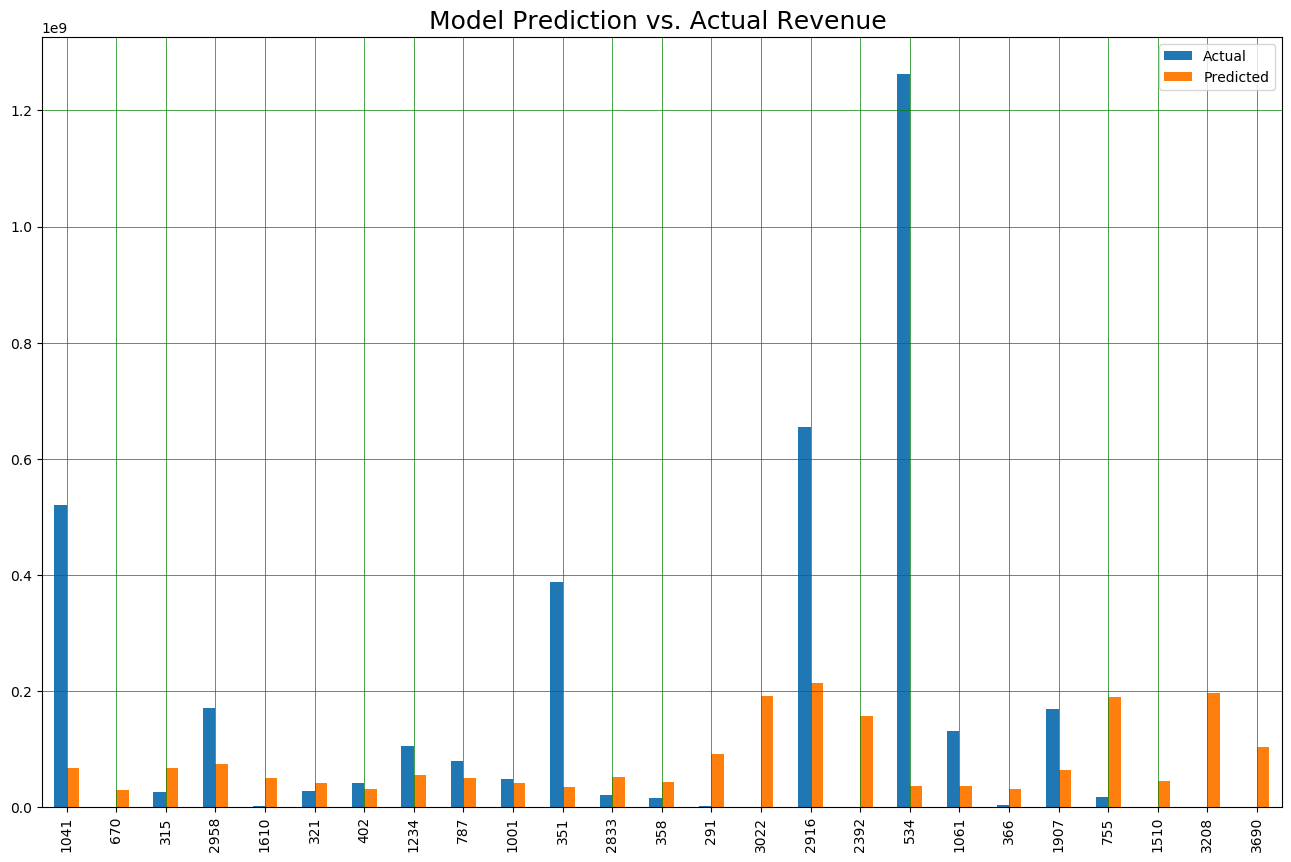

In [310]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Model Prediction vs. Actual Revenue ',fontsize=18)
plt.show()

# Let's apply Lasso Regression and see if we can shrink the coeffecients our models deems ineffective

In [275]:
from sklearn.linear_model import Lasso
import numpy as np

In [270]:
lasso = Lasso()

In [271]:
lasso.fit(x_train_normal,y_train)

/Users/stevenoluwaniyi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0622451071434416e+19, tolerance: 5914558965109482.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [276]:
train_score=lasso.score(x_train_normal,y_train)
test_score=lasso.score(x_test_norm,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [277]:
train_score

0.0985918811413743

In [278]:
test_score

-0.11124254946372059

In [279]:
coeff_used

240

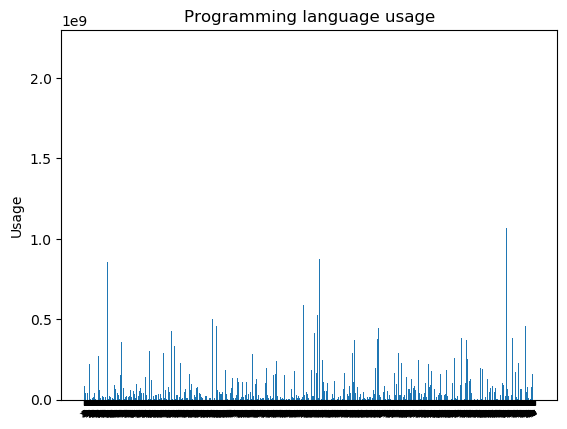

In [288]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = x_final["season_published"]
y_pos = np.arange(len(objects))
performance = y_income

plt.bar(y_pos, performance)
plt.xticks(y_pos, objects, fontsize=5, rotation=30)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [285]:
x_final["season_published"].unique()

array([ 8, 12,  7,  2, 11,  6,  1,  9, 10,  5,  4,  3])

In [289]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth = 20,random_state=0)
regr.fit(x_train_normal,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [290]:
y_pred = regr.predict(x_test_norm)

In [291]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
1041,520884847,6.723584e+07
670,295493,2.905037e+07
315,25504513,6.667957e+07
2958,170268750,7.361076e+07
1610,1356828,4.972579e+07


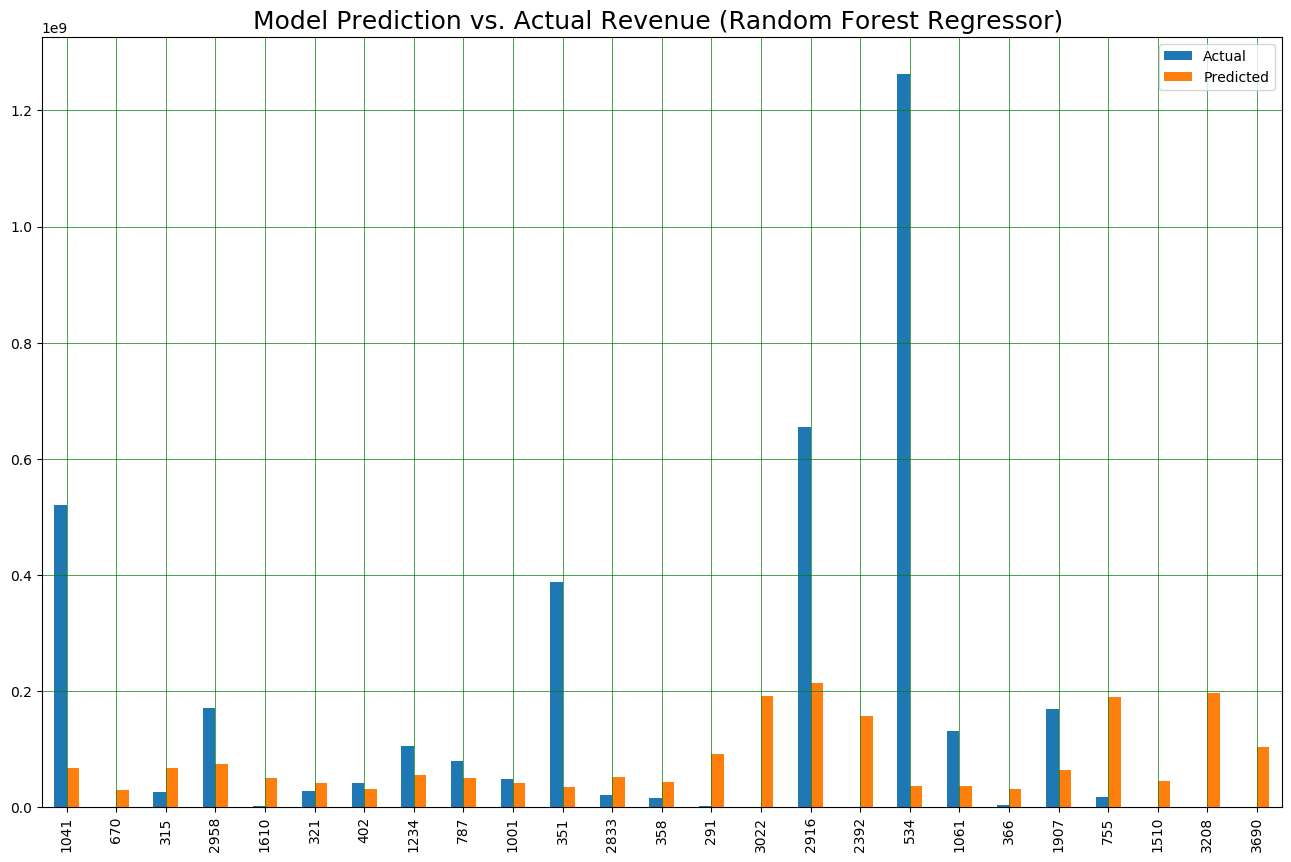

In [309]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Model Prediction vs. Actual Revenue (Random Forest Regressor) ',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Budget to Revenue')

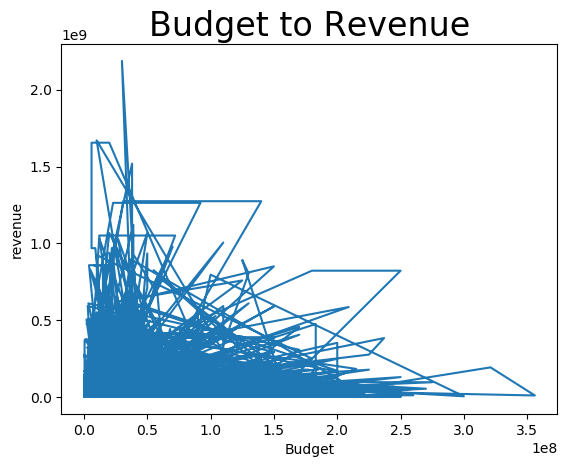

In [308]:
plt.plot(x_final["budget"],y_income)
plt.xlabel('Budget')
plt.ylabel('revenue')
plt.title('Budget to Revenue',fontsize=24)


Text(0, 0.5, 'revenue')

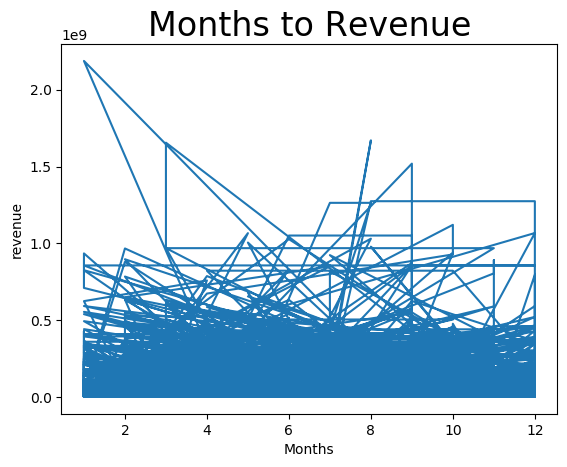

In [307]:
plt.plot(x_final["season_published"],y_income)
plt.title('Months to Revenue',fontsize=24)
plt.xlabel('Months')
plt.ylabel('revenue')

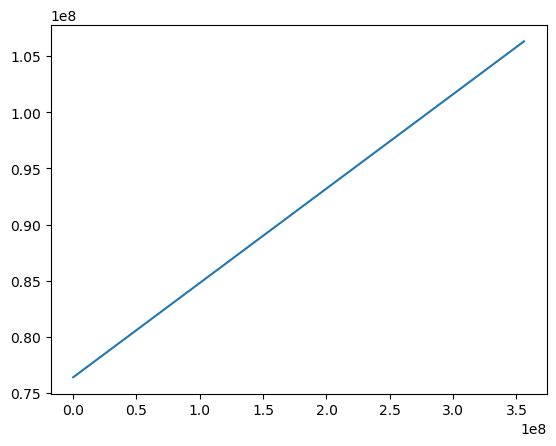

In [298]:
plt.plot(np.unique(x_final["budget"]), np.poly1d(np.polyfit(x_final["budget"], y_income, 1))(np.unique(x_final["budget"])))

Text(0.5, 1.0, 'Months to Revenue')

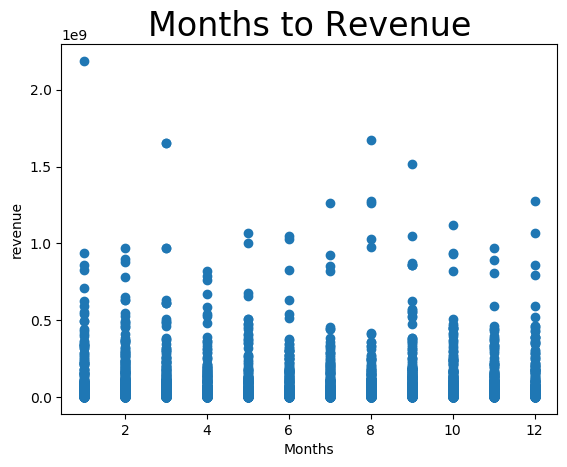

In [311]:
plt.scatter(x_final["season_published"],y_income)
plt.xlabel('Months')
plt.ylabel('revenue')
plt.title('Months to Revenue',fontsize=24)

Text(0.5, 1.0, 'Budget to Revenue')

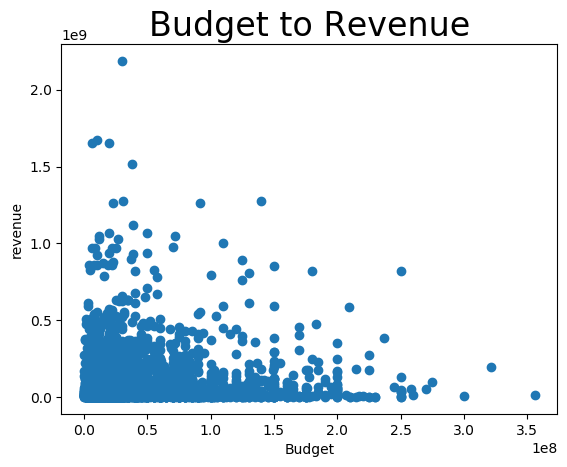

In [305]:
plt.scatter(x_final["budget"],y_income)
plt.xlabel('Budget')
plt.ylabel('revenue')
plt.title('Budget to Revenue',fontsize=24)